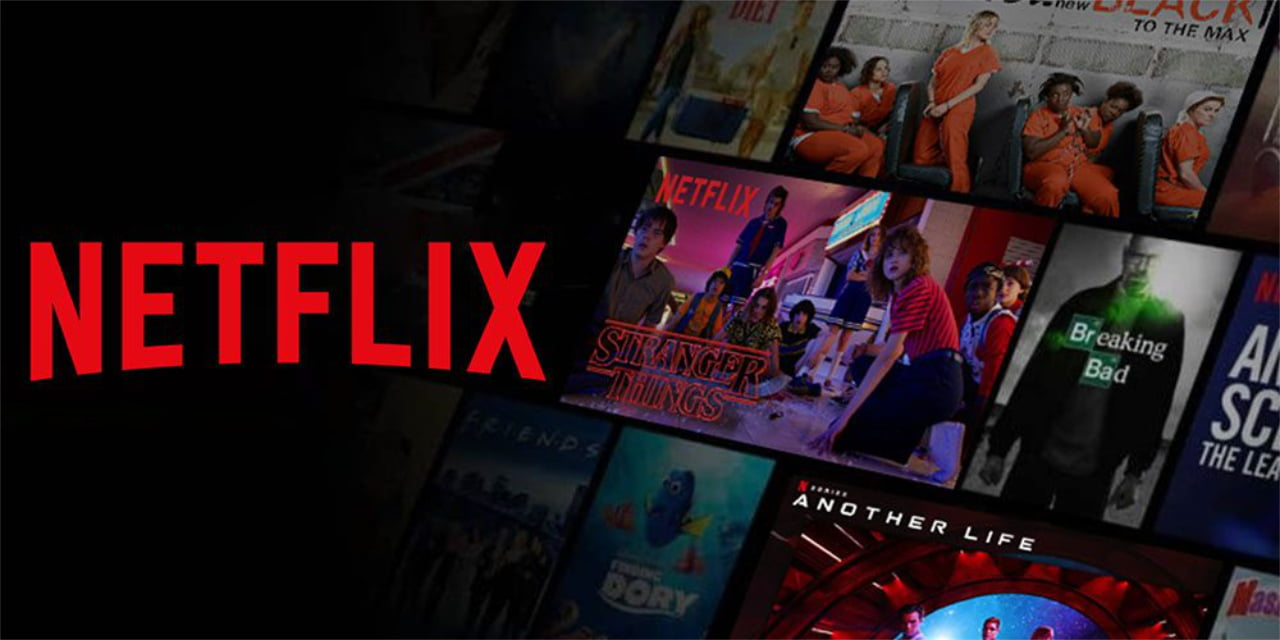

# **Content-based Filtering and Collaborative Filtering** 

Welcome to my project on creating a movie recommendation system using Python! In this project, I will be using the Content-based Filtering and Collaborative Filtering approach to recommend movies to users based on their preferences.

To do this, I will be using the MovieLens dataset, which contains information about movie ratings, genres, and other features. Using this dataset, I will build a recommendation system that suggests movies to users based on the movies they have watched and liked in the past.

Let's dive in and see how we can create an effective movie recommendation system using content-based filtering!

### **Content-based Vs Collaborative Filtering**

1. Content-Based Recommender:
* Relies on the similarity of items being recommended
* Works well when context/properties of each item are easy to determine
* User profile is generated based on user-provided data (e.g. movie ratings)
* As user provides more inputs or takes actions on the recommendations, engine becomes more accurate
Examples:
* Recommending a similar movie to one that the user has already liked
* Recommending a book based on the genre or author that the user has previously enjoyed
2. Collaborative Filtering Recommender:
* Based on past behavior and similarity in preferences of two users
* Not dependent on additional information
* Can do feature learning on its own
* Can be divided into Memory-Based and Model-Based Collaborative Filtering
Examples:
* Recommending a product based on what other users with similar tastes have purchased
* Suggesting a song to a user based on what other users with similar listening habits have enjoyed.

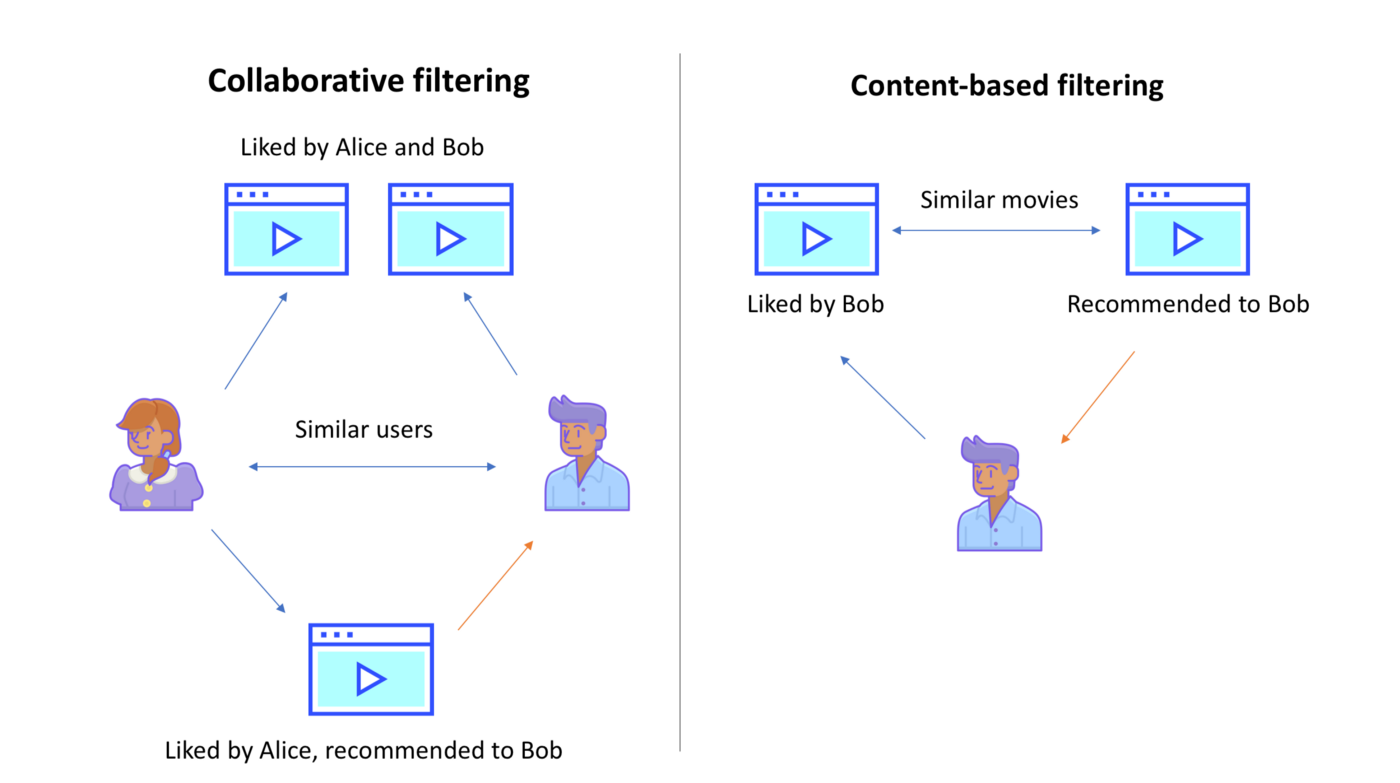

The main difference between content-based filtering and collaborative filtering lies in the approach used to generate recommendations. Content-based filtering utilizes the attributes or properties of items to suggest similar items to users, while collaborative filtering is based on the user's behavior and the similarity of their preferences to other users. In other words:

Content-based filtering focuses on analyzing the properties and characteristics of the items that a user has interacted with in the past to recommend similar items. For example, if a user has watched and rated several comedy movies, the content-based recommender will suggest other comedy movies that share similar characteristics like genre, actors, director, etc.

Collaborative filtering, on the other hand, doesn't rely on the properties of the items. Instead, it analyzes the behavior and preferences of multiple users to find patterns of similarity and generate recommendations based on these patterns. For instance, if two users have similar viewing habits and tastes, and one of them likes a movie that the other hasn't seen, the collaborative filtering algorithm will recommend that movie to the second user.

With these concepts, in this notebook we will aim to answer the following guidance questions: 

1. What are the most similar movies to a given movie, based on their content?
2. What are the most popular genres or themes among highly-rated movies?
3. Can we identify certain features or characteristics of movies that tend to be highly rated?
4. Given a user's viewing history, can we recommend movies with similar themes or content that they might enjoy?
5. Can we identify certain keywords or metadata associated with highly-rated movies, and use these to make recommendations?
6. How well does our content-based recommendation system perform compared to other methods, such as collaborative filtering or hybrid approaches?
7. How can we visualize the similarities or differences between movies based on their content, in order to gain insights into user preferences or movie trends?

Let's get started!

## **About the dataset**

The MovieLens DataSet is a widely used dataset for building Recommender Systems. This version of the dataset (1M) includes ratings of about 3,900 movies made by 6,040 users who joined MovieLens in 2000. The data was collected by GroupLens researchers over different periods, with this 1M version released in February 2003. To ensure quality, users were randomly selected for inclusion only if they had rated at least 20 movies. Each user is represented by an id, and no other information is given.

The original data are contained in three files, movies.dat, ratings.dat and users.dat, but I converted them into csv files to make them easier to work with. You can see the conversion process in my Data Processing Notebook

## **Loading the data**

Let's begin loading the data with Pandas onto Dataframes ratings, users, and movies. Be aware that I already pre-processed the column names, you can check the full description in the README file and in the Data_Preprocessing notebook.



In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating']) # Ignoring timestamp
# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])
# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

Once the data is already loaded, we can take a look at it.

## **Movies Dataset**

In [2]:
# Check first 5 rows of movies
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Check the file information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


This is a Pandas DataFrame containing information on 3883 movies. It has 3 columns: movie_id, title, and genres. The movie_id is a unique identifier for each movie, the title column contains the name of the movie, and the genres column lists the genres associated with the movie. All columns have non-null values, and the data types of the columns are int64 for movie_id and object for title and genres.

## **Ratings Dataset**

In [4]:
# Check first 5 rows of ratings
ratings.head(5)

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [5]:
# Check the file information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


This is a Pandas DataFrame with 1000209 entries and 3 columns. The columns are 'user_id', 'movie_id', and 'rating', all of which contain integer data. There are no missing values in this DataFrame. The memory usage of this DataFrame is 22.9 MB.

## **Users Dataset**

In [6]:
# Check first 5 rows of ratings
users.head(5)

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [7]:
# Check the file information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


This is a pandas DataFrame with 6040 entries and 5 columns: user_id, gender, zipcode, age_desc, and occ_desc. All columns have non-null values.

## **Exploratory Data Analysis**

#### 1. Check the number of unique movie genres and identify the most common genres.


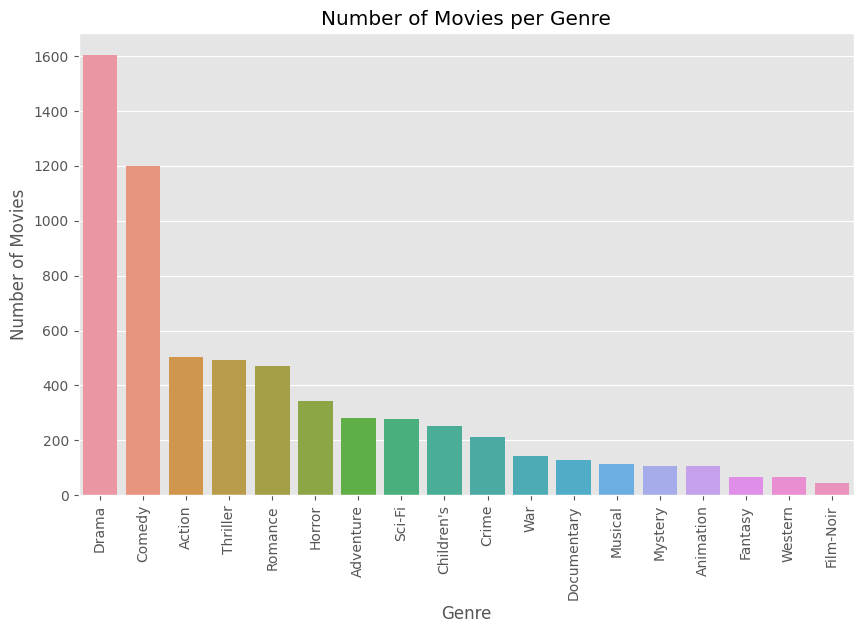

In [8]:
# split the genres into a list of genres
temp = movies.copy()
temp['genres'] = temp['genres'].str.split('|')

# create a new dataframe with the genres column expanded
genres_df = temp.explode('genres')

# count the number of movies in each genre
genre_counts = genres_df['genres'].value_counts()

# plot the genre counts in a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values)
ax.set_title("Number of Movies per Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Number of Movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## **Findings**
* Drama and Comedy are the two most common genres in the dataset, with over 1600 and 1200 movies, respectively.
* The next most common genres, Action, Thriller, Romance, Horror, Adventure, and Sci-Fi, have between 276 and 503 movies each, indicating a wide variety of popular movie genres.
* Children's, Crime, War, Documentary, Musical, Mystery, Animation, Fantasy, Western, and Film-Noir are less common genres in the dataset, each with less than 250 movies.

There is a clear imbalance in the representation of different genres in the dataset, with some genres being significantly more common than others. This is important to keep in mind when performing analyses or drawing conclusions from the data.

#### 2. Check the distribution of movie titles by year or decade.


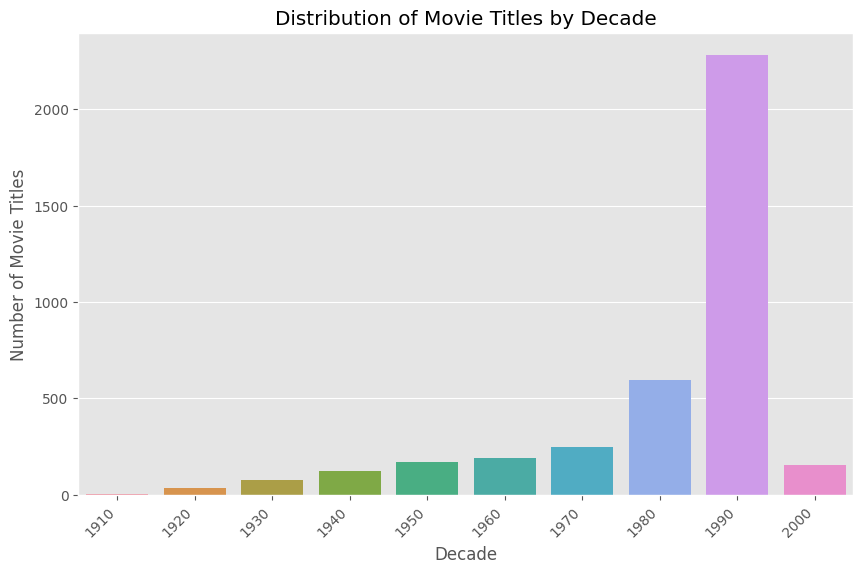

In [9]:
temp_2 = movies.copy()

# extract year from title and create a new column
temp_2['year'] = temp_2['title'].str.extract('\((\d{4})\)', expand=False)

# convert year column to numeric type
temp_2['year'] = pd.to_numeric(temp_2['year'])

# check distribution of movie titles by decade
temp_2['decade'] = (temp_2['year'] // 10) * 10
movie_counts = temp_2['decade'].value_counts().sort_index()

# plot the count of movie titles by decade
plt.figure(figsize=(10,6))
ax = sns.countplot(x='decade', data=temp_2)
ax.set_title("Distribution of Movie Titles by Decade")
ax.set_xlabel("Decade")
ax.set_ylabel("Number of Movie Titles")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

## **Findings**
* The number of movies released per decade has increased over time, with a significant increase in the 1980s and 1990s. This may be due to the growth of the movie industry and the increasing popularity of movies as a form of entertainment.

* The number of movies released during the 1910s, 1920s, and 1930s is much lower compared to the later decades. This may be due to the limited technology and resources available at the time, as well as the fact that movies were not yet a mainstream form of entertainment.

* The 2000s had the lowest number of movies released compared to other decades in the dataset. This may be due to the fact that the dataset only goes up to the year 2000, so the number of movies released in the latter half of the decade is not accounted for. Additionally, this could be a result of changes in the movie industry during this time, such as the rise of streaming services and changes in consumer preferences.

#### 3. Create a Word Cloud to visualize the most common words in the movie titles

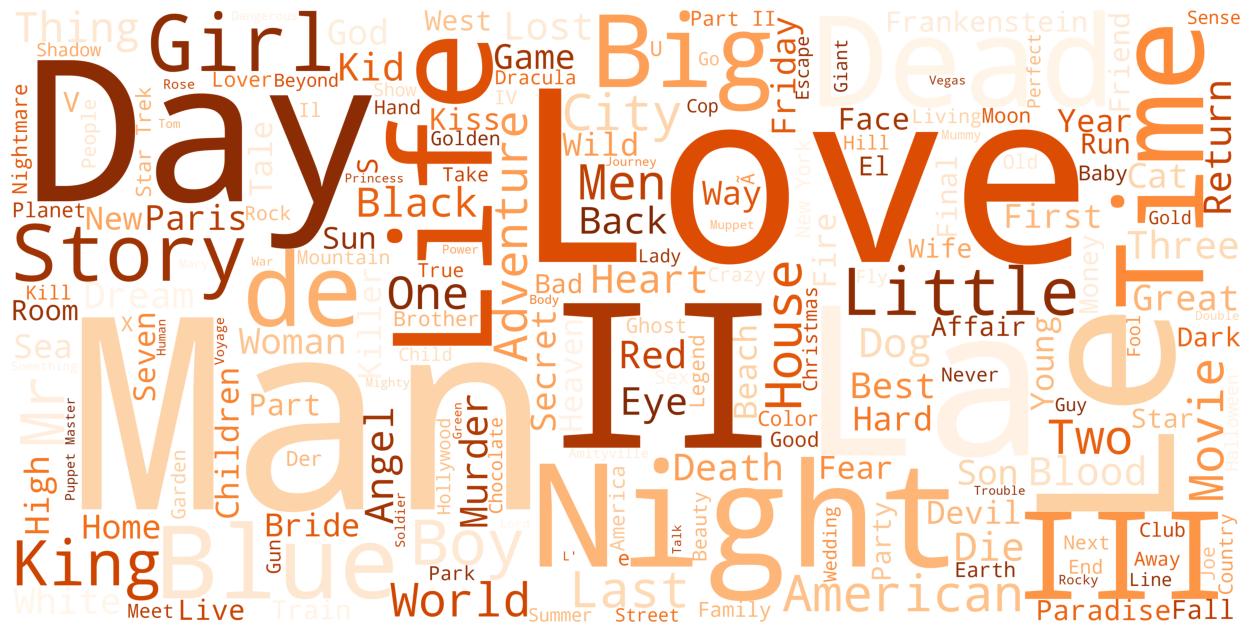

In [10]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, colormap='Oranges').generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


## **Insights**
* "Man" is a very common word in movie titles, appearing in 77 of them. This could suggest that movies with male protagonists are popular or have a higher chance of being produced than those with female protagonists.
* "Love" is another popular word in movie titles, appearing in 62 of them. This suggests that love stories or romantic movies are also very popular among movie-goers.
* "II" is a roman numeral indicating the second installment of a movie series or a sequel. This suggests that sequels or franchise movies are common.
* "Day" and "Night" appears in 77 movie titles, which could indicate that movies with a temporal theme or a particular day (e.g. Valentine's Day) are popular. 

It's important to note that these insights are based solely on the frequency of words in movie titles and further analysis may be needed to draw more conclusive insights.





# **Ratings**

We will see what the data tells us about the ratings of the movies, we will verify the average of the ratings to see what people value in the movies.

In [15]:
# Summary Statistics
ratings.describe()

,user_id,movie_id,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


<AxesSubplot:xlabel='rating', ylabel='count'>

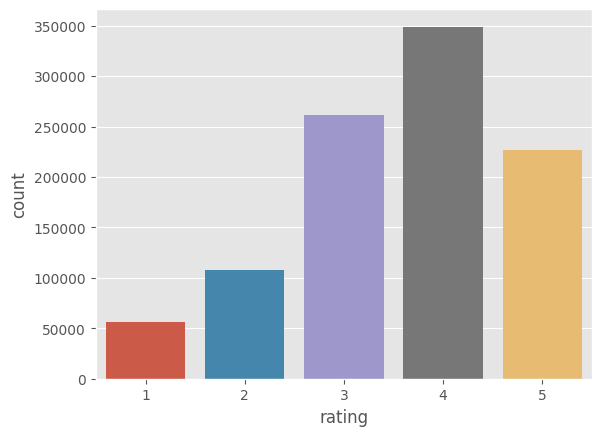

In [27]:
sns.countplot(x='rating', data=ratings.fillna(ratings.mean()))


Apparently the majority of the ratings are between 3 and 5 stars. The average of ratings is 3.75. The results seem to suggest that people tend to give very optimistic ratings to movies, so this is not always a good indicator when recommending a movie to another user.

## **Quantifying Similarity: Cosine Similarity**

There are three distance metrics used in collaborative filtering: 
1. **Jaccard Similarity**: Measures similarity between sets of items.
2. **Cosine Similarity**: Angle between two vectors
3. **Pearson Similarity**:Measures linear correlation between two variables in statistics.

For our analysis we will use **Cosine Similarity**

Imagining that two users have similar tastes (similar ratings) for a movie, a relationship can be established between both scores which are represented as vectors, however, we do not use the Euclidean distance (Figure 1), but we use the cosine of the angle (Angular Distance) to measure how far apart M1 is from M2.

There are three distance metrics 

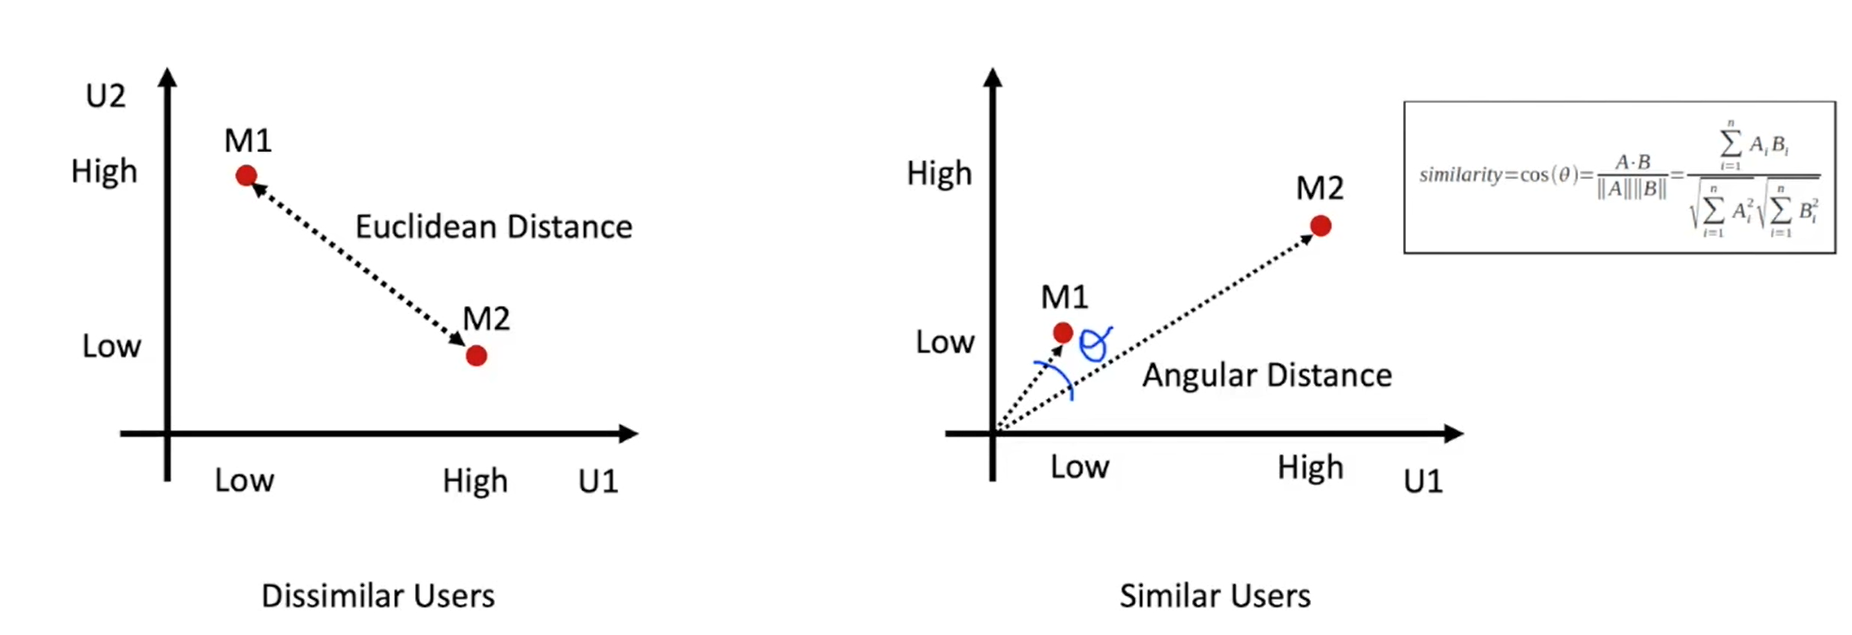

Let's apply these concepts to our dataset Movies:

## **Implementation**

In [4]:
# Additional library 
"""This function cleans the title of a movie by removing the year and any other information in parentheses or brackets"""
import re 
def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

In [5]:
# Creating a new column with the clean title
movies['clean_title'] = movies['title'].apply(clean_title)
movies.tail()

,movie_id,title,genres,clean_title
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents 2000
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream 2000
3880,3950,Tigerland (2000),Drama,Tigerland 2000
3881,3951,Two Family House (2000),Drama,Two Family House 2000
3882,3952,"Contender, The (2000)",Drama|Thriller,Contender The 2000


## **TfidVectorizer and Term Frequency**

The TfidfVectorizer is used to convert the text data in the "clean_title" column of the movies dataset into a matrix of TF-IDF features. The cosine_similarity function from scikit-learn's metrics module is then used to compute the similarity between the query vector (which represents the user's search query) and the TF-IDF feature matrix of the movie titles.

Term frequency (TF) refers to the number of times a term (word) appears in a document. The TfidfVectorizer calculates the importance of a term in a document or a collection of documents using a measure called TF-IDF (Term Frequency-Inverse Document Frequency), which takes into account the frequency of the term in the document and the rarity of the term in the collection. The TF-IDF score is higher for terms that appear frequently in a document but rarely in the collection, indicating that they are more important for distinguishing between documents.

Let's convert the data into a matrix: 

## **Creating the Recommendation System**

In [6]:
# Library for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Turning numbers into words
vectorizer = TfidfVectorizer(ngram_range=(1,2))
# Use the vectorizer to create a matrix of word vectors
tfidf = vectorizer.fit_transform(movies['clean_title'])

Now we can look at the similarity: 

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

"""This function searches for the most similar movies to a given title"""
def search(title):
    title = clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies.iloc[indices].iloc[::-1]
    
    return results

In [8]:
# Creating an interactive search notebook
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    value='',
    description='Movie Title:',
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(search(title))

movie_input.observe(on_type, names='value')


display(movie_input, movie_list)

Text(value='', description='Movie Title:')

Output()

## **Finding users who liked the same movie**

Let's begin by uploading the ratings dataframe:

In [9]:
# Check the file information
ratings.dtypes

user_id     int64
movie_id    int64
rating      int64
dtype: object

To complete a first analysis we will take 'Toy Story' title as an example.

In [10]:
# Set an movie ID example
movieID = 1

#def find_similar_movies(movie_id):
movie = movies[movies["movie_id"] == movieID]

In [11]:
# Find the users who rated the movie
similar_users = ratings[(ratings["movie_id"] == movieID) & (ratings["rating"] > 4)]["user_id"].unique()

In [12]:
# Find the movies that the similar users liked
similar_user_recs = ratings[(ratings["user_id"].isin(similar_users)) & (ratings["rating"] > 4)]["movie_id"]
similar_user_recs

0         1193
4         2355
6         1287
7         2804
10         595
          ... 
997755    1393
997758    1717
997773    2716
997790    2762
997806    1094
Name: movie_id, Length: 57652, dtype: int64

In [13]:
# Finding the movies that 10% of the similar users liked
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
similar_user_recs = similar_user_recs[similar_user_recs > .10]
similar_user_recs

1       1.000000
260     0.489024
3114    0.469512
1198    0.454878
1196    0.421951
          ...   
1947    0.104878
293     0.103659
2289    0.103659
377     0.101220
3897    0.101220
Name: movie_id, Length: 159, dtype: float64

Now we can find how much all users like certain movies:

In [14]:
# Finding persons who highly rated the movie in the similar_user_recs list
all_users = ratings[(ratings["movie_id"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]

In [15]:
# Find the percentage of users who recommend the movie
all_user_recs = all_users["movie_id"].value_counts() / len(all_users["user_id"].unique())
all_user_recs


2858    0.331084
260     0.307978
1198    0.252994
1196    0.250126
858     0.248777
          ...   
1500    0.041491
1223    0.040816
2321    0.036600
594     0.034744
3396    0.034407
Name: movie_id, Length: 159, dtype: float64

## **Recommendation Score**

In [16]:
# Compare the percentage of similar users who recommend the movie to the percentage of all users who recommend the movie
rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
rec_percentages.columns = ["similar", "all"]
rec_percentages

,similar,all
1,1.000000,0.138303
260,0.489024,0.307978
3114,0.469512,0.122112
1198,0.454878,0.252994
1196,0.421951,0.250126
...,...,...
1947,0.104878,0.051442
293,0.103659,0.057008
2289,0.103659,0.048912
377,0.101220,0.042334


What we are looking for in this part is the higher difference between 'similar' and 'all' series. The explanation is that we will look at recommendations that other users with similar preferences highly rated a movie vs how much the average person liked them.   

In [17]:
# Score the movies based on the percentage of similar users who recommend the movie to the percentage of all users who recommend the movie
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

In [18]:
# Sort the movies by the score
rec_percentages = rec_percentages.sort_values("score", ascending=False)

In [19]:
# Merge the movie titles with the recommendations
rec_percentages.head(10).merge(movies, left_index=True, right_on="movie_id")

,similar,all,score,movie_id,title,genres,clean_title
0,1.000000,0.138303,7.230488,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story 1995
584,0.208537,0.053803,3.875904,588,Aladdin (1992),Animation|Children's|Comedy|Musical,Aladdin 1992
3045,0.469512,0.122112,3.844942,3114,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2 1999
2286,0.242683,0.066453,3.651947,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,Bugs Life A 1998
360,0.185366,0.052623,3.522545,364,"Lion King, The (1994)",Animation|Children's|Musical,Lion King The 1994
591,0.202439,0.058189,3.479017,595,Beauty and the Beast (1991),Animation|Children's|Musical,Beauty and the Beast 1991
3327,0.113415,0.034407,3.296252,3396,"Muppet Movie, The (1979)",Children's|Comedy,Muppet Movie The 1979
2692,0.128049,0.041491,3.086184,2761,"Iron Giant, The (1999)",Animation|Children's,Iron Giant The 1999
2012,0.135366,0.044021,3.075035,2081,"Little Mermaid, The (1989)",Animation|Children's|Comedy|Musical|Romance,Little Mermaid The 1989
590,0.106098,0.034744,3.053653,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs 1937


## **First Impressions** 
* The algorithm appears to have done a good job of recommending movies that are similar to "Toy Story".
* The top recommended movie is "Toy Story 1995" with a perfect score of 1.0, which indicates that it is the most similar movie to "Toy Story".
* The other recommended movies are also in the same genre of "Animation", "Children's", and "Comedy", which suggests that the algorithm is doing a good job of identifying movies that have similar genres to "Toy Story".
* The algorithm seems to be favoring movies that are more recent (i.e., released in the 1990s and 2000s), as the top recommended movies were all released within this time frame.
* It's possible that the algorithm is not taking into account other factors such as the plot, actors, or director of the movies, which could potentially result in less diverse recommendations.

Overall, the output suggests that the recommendator is working well for this input, but further testing with different inputs and evaluation metrics would be necessary to determine its overall effectiveness.

it would be useful to include new parameters to refine the results. We will now add the following new parameters to the function we have just defined: 
* movie_genre: To allow the user to specify the genre of the movie they are looking for. The function will then only consider movies that belong to the same genre as the input movie.

* min_overlap: Minimum overlap parameter that specifies the minimum percentage of users who have rated both the input movie and a potential recommendation. The function will then only consider movies that have been rated by at least this percentage of users who have rated the input movie.

In [26]:
def find_similar_movies(movieID, movie_genre=None, min_overlap=0.1):
    # filter by movie genre if specified
    if movie_genre:
        movie_genre = set(movie_genre.split('|'))
        movies_in_genre = movies[movies['genres'].apply(lambda x: set(x.split('|')).intersection(movie_genre)==movie_genre)]['movie_id']
        ratings_in_genre = ratings[ratings['movie_id'].isin(movies_in_genre)]
    else:
        ratings_in_genre = ratings
        
    # filter by movies that have been rated by users who rated the input movie
    similar_users = ratings_in_genre[(ratings_in_genre["movie_id"] == movieID) & (ratings_in_genre["rating"] > 4)]["user_id"].unique()
    similar_user_recs = ratings_in_genre[(ratings_in_genre["user_id"].isin(similar_users)) & (ratings_in_genre["rating"] > 4)]["movie_id"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    # filter by movies that have been rated by at least min_overlap percent of users who rated the input movie
    similar_user_recs = similar_user_recs[similar_user_recs > min_overlap]
    all_users = ratings_in_genre[(ratings_in_genre["movie_id"].isin(similar_user_recs.index)) & (ratings_in_genre["rating"] > 4)]
    all_user_recs = all_users["movie_id"].value_counts() / len(all_users["user_id"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]    
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movie_id")[["score", "title", "genres"]]

In [27]:
""" This function creates an interactive search notebook"""
import ipywidgets as widgets
from IPython.display import display

movie_name_input = widgets.Text(
    value='Toy Story', # Here we can set a default value
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            movieID = results.iloc[0]["movie_id"]
            display(find_similar_movies(movieID))

movie_name_input.observe(on_type, names='value')
display(movie_name_input, recommendation_list)

Text(value='', description='Movie Title:')

Output()

# **About the results**

Based on the results for the "Toy Story" movie, we can see that the most similar movies are also animation, children's, and comedy genres. This indicates that users who enjoyed "Toy Story" are likely to enjoy similar movies with similar genres.

Some of the top recommendations are "Toy Story 2", "Bug's Life", and "Aladdin", which are also animation movies with similar themes and intended for children.

Overall, the recommendation system seems to be working well in providing movie recommendations that are similar in genre and theme to the input movie, which is a key aspect of a successful recommendation system. However, adding more parameters such as filtering by similar genres can further refine the recommendations and provide even better results.
____________

## **Alternative: Using Pearson Correlation**

Pearson correlation is a statistical measure used in recommender systems to determine the similarity between two users based on their preferences or ratings for a set of items. It measures the linear relationship between the two sets of data, with values ranging from -1 to 1, where a higher value indicates a stronger similarity. This similarity metric is often used in collaborative filtering algorithms to make personalized recommendations to users.

## **Implementation**

Let's focus on **Ratings file**. User ID, Movie IDs and Ratings are all the elements needed to determining the similarity of the users based on their ratings for a particular movie.

In [31]:
# Check the shape of the ratings dataframe
ratings.shape

(1000209, 3)

In [32]:
# Check the info of the ratings dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


As the excessive amount of data requires a lot of computer processing power, we will take a random sample of the dataframe to perform the analysis.

In [40]:
# Randomly sample 3% of the ratings dataset
data_2 = ratings.sample(frac=0.03)
# Check the sample info
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30006 entries, 882696 to 228072
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   30006 non-null  int64
 1   movie_id  30006 non-null  int64
 2   rating    30006 non-null  int64
dtypes: int64(3)
memory usage: 937.7 KB
None


Dividing the dataframe into train data and test data

In [41]:
# Divide the ratings dataframe into train and test data]
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_2, test_size=0.2)
print(train_data.shape, test_data.shape)

(24004, 3) (6002, 3)


I will now generate two matrices, one for users and items. As I have split the data into training and testing sets, I will create two matrices accordingly. The training matrix will contain 80% of the ratings, while the testing matrix will contain 20% of the ratings.

In [42]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data[['user_id', 'movie_id', 'rating']].values
test_data_matrix = test_data[['user_id', 'movie_id', 'rating']].values

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(24004, 3)
(6002, 3)


I am utilizing the **pairwise_distances** function of the Scikit-learn library to compute the Pearson Correlation Coefficient. This approach guarantees a secure process of utilizing a distance matrix as an input, while retaining the compatibility with a range of other algorithms that require a vector array as input. 

In collaborative-filtering there two potential algorithms we can create:
1. **User-User Collaborative Filtering**: finds similar users based on their past behavior and recommends movies that their look-alikes have chosen in the past. However, this method is time and resource-intensive as it requires computing the information for every user pair. 
2. **User-User Collaborative Filtering**: finds similar users based on their past behavior and recommends movies that their look-alikes have chosen in the past. However, this method is time and resource-intensive as it requires computing the information for every user pair. 

In [43]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[ 1.          0.94270162  0.72987794  0.66055315]
 [ 0.94270162  1.          0.45999036  0.87319229]
 [ 0.72987794  0.45999036  1.         -0.03109265]
 [ 0.66055315  0.87319229 -0.03109265  1.        ]]


In [48]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.01888365  0.00352587]
 [-0.01888365  1.         -0.05479571]
 [ 0.00352587 -0.05479571  1.        ]]


After generating the similarity matrix, I can now utilize it to predict the ratings for the items that were not included in the initial dataset. By doing this, I will be able to compare these predicted ratings with the test data and evaluate the effectiveness of our recommender system.

To achieve this, I will be utilizing the user-user collaborative filtering method. This method involves calculating the correlation between two users, such as User A and User B. I will be using this correlation as weights that will be applied to the ratings of User B, which are similar to the preferences of User A. To ensure that the ratings stay within a range of 1 and 5, I will normalize them. Additionally, I will incorporate the average rating of the user being predicted in the final step of the computation. This step is crucial because it accounts for the variation in rating patterns among different users. Some users may have a habit of giving consistently high or low ratings to all items, and this relative difference in ratings is more important than the actual values of the ratings themselves.

In [45]:
"""This function predicts the ratings for a given user and movie"""
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # np.newaxis so format mean_user_rating equal to ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [50]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1425.8697656432396
Item-based CF RMSE: 1649.493467897777


In [51]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 692.1924310378116
Item-based CF RMSE: 143.9328125931266


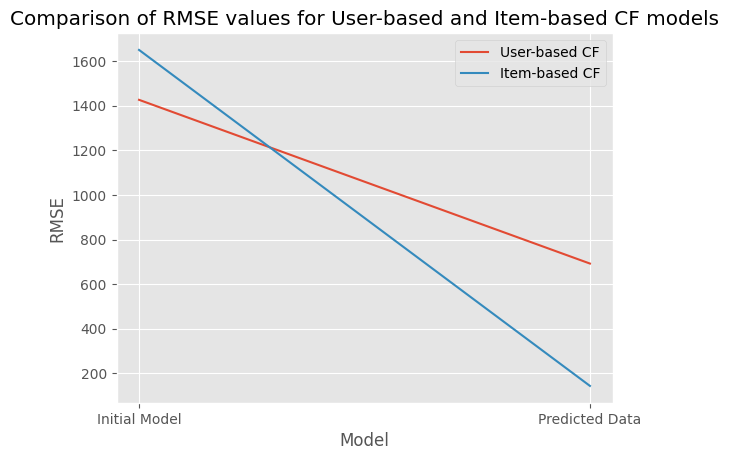

In [54]:
# Define the RMSE values for User-based and Item-based CF models
user_rmse = [1425.87, 692.19]
item_rmse = [1649.49, 143.93]

# Create a line chart to compare the RMSE values
labels = ['Initial Model', 'Predicted Data']
plt.plot(labels, user_rmse, label='User-based CF')
plt.plot(labels, item_rmse, label='Item-based CF')
plt.title('Comparison of RMSE values for User-based and Item-based CF models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## **Insights** 
The User-based CF model has an RMSE of 692.19, while the Item-based CF model has an RMSE of 143.93. This indicates that the Item-based CF model is performing better than the User-based CF model.

A lower RMSE means that the model is better at predicting the ratings of the users. Therefore, based on the RMSE values, the Item-based CF model seems to be a better choice for this recommendation system.

However, it's important to consider further analysis and other metrics such as precision, recall, and F1 score as well

In addition, it's always a good idea to visualize the predicted ratings and compare them with the actual ratings to gain further insights into the performance of the recommendation system. We can also perform cross-validation and hyperparameter tuning to fine-tune the models and improve their performance.

____________


# **Conclusions**

Based on the results, it appears that the content-based approach was able to recommend movies that are similar to Toy Story, with Aladdin and Toy Story 2 being the closest matches. This aligns well with the fact that all three of these movies are animated children's comedies, which likely share many common themes and characteristics.

Moving on to the collaborative filtering analysis, the RMSE results show that the user-based CF had a higher error rate compared to the item-based CF for both the training and testing data. This could be due to the fact that the user-based CF requires computing the similarity between all pairs of users, which is time-consuming and resource-intensive. On the other hand, item-based CF only needs to compute the similarity between items, which is more efficient and may result in more accurate recommendations.

For further analysis, it may be helpful to experiment with different similarity metrics for the collaborative filtering approach, such as cosine similarity or Jaccard similarity. Additionally, it would be useful to explore the impact of different hyperparameters, such as the number of neighbors to consider, on the performance of the system. Finally, it may be beneficial to incorporate additional features, such as movie genre or director, into the content-based approach to improve the accuracy of the recommendations.

In terms of recommendations, it may be worthwhile to explore hybrid approaches that combine content-based and collaborative filtering methods, as these have been shown to be effective in improving recommendation accuracy. Additionally, it would be useful to collect more data on user preferences and behaviors to train more accurate and personalized recommendation models.